# Introduction to Reinforcement Learning

This notebook provides an introduction to Reinforcement Learning (RL), a type of machine learning where an agent learns to make decisions by performing actions in an environment to achieve some goal. The agent learns from the outcomes of its actions, rather than from being told explicitly what to do.

### High-Level Description of Reinforcement Learning

Reinforcement Learning (RL) is a type of machine learning where an agent learns to make decisions by interacting with an environment. The key concept is learning through trial and error, primarily based on feedback from actions taken.

In RL:
- An **agent** takes actions in an environment.
- The environment then responds to these actions and presents new situations to the agent.
- The agent receives **rewards** or **penalties** based on its actions.
- Over time, the agent learns to take actions that maximize rewards.

The goal is for the agent to develop a strategy, or **policy**, for deciding actions based on the state of the environment that leads to the most reward over time.

### Intuitive Example of Reinforcement Learning

Imagine training a dog to perform a trick, like fetching a ball. Here, the dog is the **agent** and the room where it learns is the **environment**.

1. **Action**: The dog tries different approaches to fetch the ball.
2. **Reward**: If the dog successfully fetches the ball, it receives a treat.
3. **Policy Development**: Over multiple attempts, the dog starts understanding which actions (like running towards the ball and grabbing it with its mouth) lead to treats.
4. **Optimized Behavior**: Eventually, the dog learns the most effective way to fetch the ball to maximize its treats.

In this example, the dog is using reinforcement learning. It tries different actions, learns from the results, and refines its approach to improve the outcome. In computer algorithms, a similar process occurs where an AI agent learns from the consequences of its actions in a simulated environment.

----

## Key Concepts in Reinforcement Learning

1. **Agent**: The learner or decision maker.
2. **Environment**: What the agent interacts with, comprising everything the agent interacts with.
3. **Action**: All possible moves the agent can make.
4. **Reward**: Feedback from the environment based on the action taken by the agent.
5. **State**: A representation of the current situation returned by the environment.

The objective in RL is to develop a strategy, known as a policy, that the agent can use to decide its actions based on the current state to maximize cumulative future rewards.

Let's dive into the implementation and examples to understand these concepts better.

# Reinforcement Learning

Galen Wilkerson

From Tutorial:
http://amunategui.github.io/reinforcement-learning/

## Set-up and Functions

In [29]:
import numpy as np
import pylab as plt

%matplotlib notebook

import networkx as nx
from IPython.display import Math, HTML, display, Latex
from sympy import *

def plotG(G, path=[], title=''):
    '''
    Plot a graph using NetworkX with edge labels and color the borders of nodes in a specified path red.

    Parameters:
    G (networkx.Graph): The graph to be plotted.
    path (list): List of nodes in the path to highlight. Default is an empty list.
    title (str): Title of the plot. Default is an empty string.

    Returns:
    None
    '''
    fig, ax = plt.subplots()
    plt.title(title)
    pos = nx.spring_layout(G)

    # Node colors - nodes in the path are red, others are default color
    node_colors = ['red' if node in path else 'white' for node in G.nodes()]

    # Draw the graph
    nx.draw(G, pos, ax=ax, node_color=node_colors, edgecolors='black', node_size=500)
    
    # Draw node labels
    nx.draw_networkx_labels(G, pos, ax=ax)

    # Draw edge labels
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=ax)

    plt.show()

    
    
def createGraph(edge_list, goal = 7):
    '''
    Create and return a graph from a list of edges.

    Parameters:
    edge_list (list of tuples): List of edges where each edge is represented as a tuple (node1, node2).
    goal (int): The node that represents the goal in the graph. Default is 7.

    Returns:
    networkx.Graph: A graph created from the given edge list.
    '''

    G=nx.Graph()
    G.add_edges_from(edge_list)
    return(G)

def initR(edge_list, MATRIX_SIZE = 8, goal = 7):
    '''
    Initialize the reward matrix for a graph with rewards for reaching the goal and penalties otherwise.

    Parameters:
    edge_list (list of tuples): List of edges in the graph.
    MATRIX_SIZE (int): Size of the square matrix R. Default is 8.
    goal (int): The node that represents the goal. Default is 7.

    Returns:
    numpy.matrix: The initialized reward matrix.
    '''         
    # assign zeros to paths and 100 to goal-reaching edge

    # how many edges in graph? x edges


    # create matrix x*y
    R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
    R *= -1

    for edge in edge_list:
        #print(edge)
        if edge[1] == goal:
            R[edge] = 100
        else:
            R[edge] = 0

        if edge[0] == goal:
            R[edge[::-1]] = 100
        else:
            # reverse of edge
            R[edge[::-1]]= 0

    # add goal edge round trip
    R[goal,goal]= 100
    
    return(R)


def available_actions(state):
    '''
    Find available actions for a given state based on the reward matrix.

    Parameters:
    state (int): The current state/node in the graph.

    Returns:
    numpy.array: Array of available actions from the current state.
    '''
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

def sample_next_action(available_actions_range):
    '''
    Randomly select the next action from available actions.

    Parameters:
    available_actions_range (numpy.array): Array of available actions.

    Returns:
    int: The chosen next action.
    '''
    next_action = int(np.random.choice(available_actions_range,1))
    return next_action

def update(my_Q, my_R, current_state, action, gamma):
    '''
    Update the Q matrix using the Bellman equation.

    Parameters:
    my_Q (numpy.matrix): The current Q matrix.
    my_R (numpy.matrix): The reward matrix.
    current_state (int): The current state.
    action (int): The chosen action.
    gamma (float): Discount factor.

    Returns:
    tuple: A tuple containing the new score and updated Q matrix.
    '''

    max_index = np.where(my_Q[action,] == np.max(my_Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = my_Q[action, max_index]

    my_Q[current_state, action] = my_R[current_state, action] + gamma * max_value
    #print('max_value', my_R[current_state, action] + gamma * max_value)

    if (np.max(my_Q) > 0):
        return(np.sum(my_Q/np.max(my_Q)*100), my_Q)
    else:
        return (0, my_Q)
    
def training(R, MATRIX_SIZE = 8, gamma = 0.8):
    '''
    Train the Q-learning model.

    Parameters:
    R (numpy.matrix): The reward matrix.
    MATRIX_SIZE (int): Size of the square matrix R. Default is 8.
    gamma (float): Discount factor for Q-learning. Default is 0.8.

    Returns:
    tuple: A tuple containing scores for each training step and the final Q matrix.
    '''
    # learning parameter
    #gamma = 0.8

    
    Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

    
    # Training
    scores = []
    for i in range(700):
        current_state = np.random.randint(0, int(Q.shape[0]))
        available_act = available_actions(current_state)
        action = sample_next_action(available_act)
        score, Q = update(Q, R, current_state,action,gamma)
        scores.append(score)
        #print ('Score:', str(score))
    
    return(scores, Q)

def testing(Q, current_state = 0):
    '''
    Test the trained Q-learning model to find the path from a start state to the goal.

    Parameters:
    Q (numpy.matrix): The trained Q matrix.
    current_state (int): Starting state for testing. Default is 0.

    Returns:
    list: A list of states representing the path from start to goal.
    '''

    # Testing
    #current_state = 0
    steps = [current_state]

    while current_state != 7:

        next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]

        if next_step_index.shape[0] > 1:
            next_step_index = int(np.random.choice(next_step_index, size = 1))
        else:
            next_step_index = int(next_step_index)

        steps.append(next_step_index)
        current_state = next_step_index
        
    return(steps)

def plotScores(scores, title = ''):
    '''
    Plot the scores obtained during training.

    Parameters:
    scores (list): List of scores obtained in each step of training.
    title (str): Title of the plot. Default is an empty string.

    Returns:
    None
    '''
    plt.figure()
    plt.plot(scores)
    plt.xlabel('steps')
    plt.ylabel('score')
    plt.title(title)
    plt.show()
    
def show_latex_matrix(matrix1, pre_latex = "", post_latex = ""):
    '''
    Display a matrix in LaTeX format in a Jupyter Notebook.

    Parameters:
    matrix1 (numpy.matrix): The matrix to be displayed.
    pre_latex (str): String to be displayed before the matrix. Default is an empty string.
    post_latex (str): String to be displayed after the matrix. Default is an empty string.

    Returns:
    IPython.display.Math: Display object for the matrix in LaTeX format.
    '''
    '''
    '''
    
    display(HTML("<script src='https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/"
               "latest.js?config=default'></script>"))

    return(Math(pre_latex + latex(Matrix(matrix1)) + post_latex))

# Intuitive Representation of the Graph

The graph created from the provided edge list can be intuitively understood as a simplified map of a network, where each node represents a distinct point or location, and each edge represents a path or connection between these points.

In this network:
- Node 0 can be seen as the starting point, which directly leads to Node 1.
- Node 1 acts as a central hub, branching out to other key areas (Nodes 2 and 5).
- Node 5 could represent another junction, linking to different nodes (Nodes 4 and 6).
- Node 2 serves as an additional branching point, providing routes to Nodes 3 and 7.

The goal of Node 7, being the end point of several paths, might represent a specific target or destination of interest in the network. This could be analogous to a key location or endpoint in various real-world networks, such as a central office in a communication network, a major intersection in transportation systems, or a critical state in a decision process.

Overall, the graph mirrors many real-life scenarios where different paths and connections lead to a significant or central node, emphasizing the interconnected nature of systems and the importance of certain nodes within these networks.



<IPython.core.display.Javascript object>


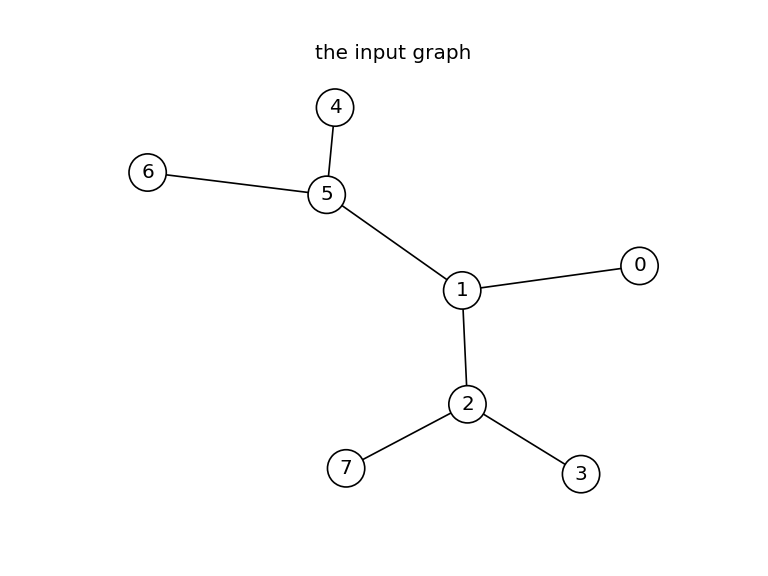

In [30]:
edge_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]

MATRIX_SIZE = 8
goal = 7

G = createGraph(edge_list, goal)
plotG(G, title = 'the input graph')

In [31]:
# train the R edge cost matrix
R = initR(edge_list, MATRIX_SIZE, goal)
show_latex_matrix(R)

<IPython.core.display.Math object>

# Training the Q Path Cost Matrix and Visualizing Training Scores

The code snippet initiates a training process on a Q-learning model and visualizes its performance over time.

## Training the Q-learning Model

`training(R)` is a function call that trains a Q-learning model using the reward matrix `R`. The training process involves the model learning the most optimal paths from various starting points to a goal in the graph, based on rewards and penalties defined in `R`. The function returns two key outputs:

- `scores`: A list of scores indicating the model's performance in each step of the training. Higher scores typically mean better performance in choosing optimal paths.
- `Q`: The trained Q matrix, which encapsulates the learned path costs or values. Each element in this matrix represents the learned 'quality' of taking a certain action in a particular state.

## Visualizing Training Scores

`plotScores(scores, 'training scores')` is a function call that plots the training scores over the training iterations. This visualization helps in understanding how the model's performance evolves with training. An upward trend in the plot would suggest that the model is effectively learning to navigate the network more efficiently over time.


<IPython.core.display.Javascript object>


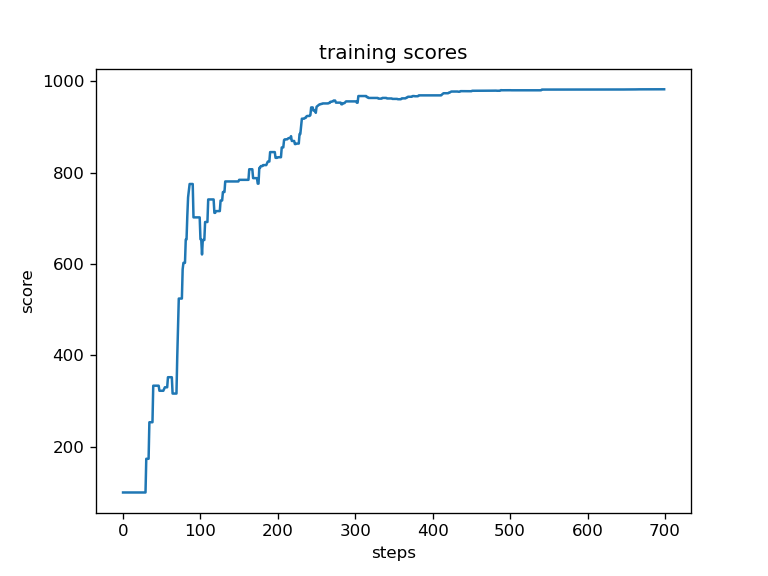

In [32]:
# train the Q path cost matrix
scores, Q = training(R)

plotScores(scores, 'training scores')

In [33]:
print("Trained normalized Q matrix:")
Q_normed = (Q/np.max(Q)*100).round(3)
show_latex_matrix(Q_normed)

Trained normalized Q matrix:


<IPython.core.display.Math object>

In [34]:
steps = testing(Q, current_state = 0)

print("Most efficient path:")
print(steps)

Most efficient path:
[0, 1, 2, 7]


<IPython.core.display.Javascript object>


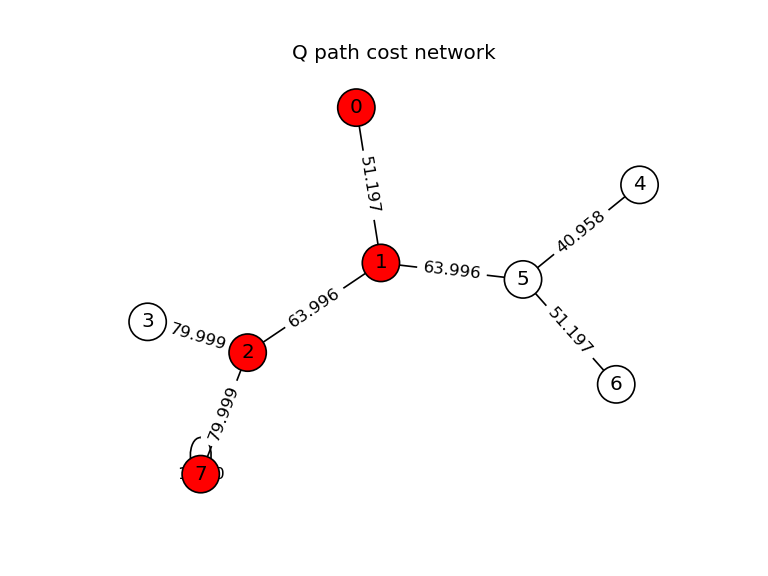

In [36]:
Q_graph = nx.from_numpy_matrix(Q_normed)
plotG(Q_graph, steps, title = 'Q path cost network');